In [1]:
# /Users/chriswesterman/Library/Jupyter/nbextensions/snippets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sigmoid Curve 

Using a probability threshold to classify an instance 

<img src="sigmoid.png" alt="drawing" width="500"/>


## Logit Space

Converting probabilities into log odds to view a linear relationship and explainability 

In [3]:
# Setup a range from 1% probability to 100% probability
p = np.arange(0.01,1,0.005)
print('Probabilities: ', p[0:3])
# Convert probabilities to odds 0.01 / (1-0.01) <=> (0.09)
odds = p / (1-p)
print('Odds: ', odds[0:3])
# Get the natural log of those odds
print('Log Odds: ', np.log(odds)[0:3])

Probabilities:  [0.01  0.015 0.02 ]
Odds:  [0.01010101 0.01522843 0.02040816]
Log Odds:  [-4.59511985 -4.18459144 -3.8918203 ]


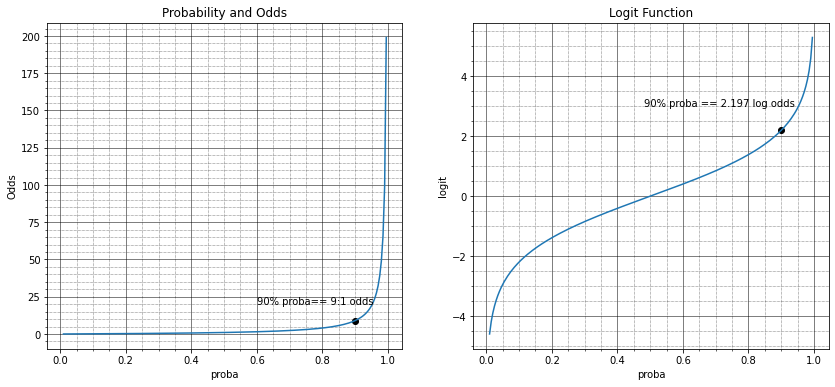

e**logodds == odds
2.718..**2.197.. == 9


In [4]:
# log-odds = LOGIT
plt.figure(figsize=(14,6))
# Plot our probabilty vs. odds
plt.subplot(1,2,1)
plt.plot(p, odds); plt.ylabel("Odds"); plt.xlabel("proba")
plt.title('Probability and Odds')
# Add grid
plt.grid(); plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Add marker
plt.text(0.6, 20, '90% proba== 9:1 odds')
plt.scatter(0.9, (0.9/(1-0.9)), c='black')

# Plot our probability vs log odds
plt.subplot(1,2,2)
plt.plot(p, np.log(odds)); plt.xlabel('proba'); plt.ylabel('logit')
plt.title('Logit Function')
# Add grid
plt.grid(); plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
#Add marker
plt.text(0.48, 3, '90% proba == 2.197 log odds')
plt.scatter(0.9, np.log(0.9/(1-0.9)), c='black');
plt.show()
print('e**logodds == odds')
print('2.718..**2.197.. == 9')

## Logit Space

<img src="logit.png" alt="drawing" width="900"/>


In [5]:
titanic = sns.load_dataset("titanic")
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### No features

In [6]:
import statsmodels.formula.api as smf
# We don't pass any columns to use to predict so it will return the overall survival logodd
model1 = smf.logit(formula='survived ~ 1', data=titanic).fit();
model1.params

Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4


Intercept   -0.473288
dtype: float64

**log_odd** = -0.473288

**odd** (e^odd = log_odd): ~2.178^odd = -0.473288...odd = 0.62

**proba** (odd/1+odd): 0.62 / (1+0.62).... proba = 0.38

In [7]:
# much faster to take mean of boolean column
# total number of survived / count of passengers
titanic.survived.mean()

0.3838383838383838

### With Features

In [8]:
# Slopes refer to increase in LOG ODDS not probabilities
model2 = smf.logit(formula='survived ~ fare', data=titanic).fit()
model2.params

Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6


Intercept   -0.941330
fare         0.015197
dtype: float64

#### Explaining our slopes

**$1 in fare increase results in 0.015197 increase in log odds**

Someone who paid $0 in fare has a:

**log odds** of survival (intercept) of -0.941330

**odds** of survival (exp(log odds)) of 0.390108

**probability** of survival (odds / (1+odds)) of 0.2806 

Someone who paid $1 in fare has a:

**log odds** of survival (intercept + slope) of -0.926133

**odds** of survival (exp(log odds)) of 0.39608 

**probability** of survival (odds / (1+odds)) of 0.2837

In [9]:
import math
print('Odds percent increase with $1 increase: ', round(math.exp(model2.params[1]),3))
print('0.390108 vs 0.39608:', round(0.39608/0.390108,3))
print('probability increase: ', round(0.2837/0.2806,3))

Odds percent increase with $1 increase:  1.015
0.390108 vs 0.39608: 1.015
probability increase:  1.011


### Predicting with our model

In [10]:
# Model prediction function will return to us the probability though
cost = [0,1,1000]
predictions = model2.predict(pd.DataFrame({'fare': cost}))

for c, pred in zip(cost,predictions):
    print('Probability of survival with ${:,} fare: '.format(c), '{:.4%}'.format(pred))

Probability of survival with $0 fare:  28.0632%
Probability of survival with $1 fare:  28.3710%
Probability of survival with $1,000 fare:  99.9999%


### Evaluating the model

In [11]:
# We still have our P values, 95% confidance intercal, (pseudo)R2, etc
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 May 2021   Pseudo R-squ.:                 0.05822
Time:                        18:40:46   Log-Likelihood:                -558.78
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.427e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9413      0.095     -9.895      0.000      -1.128      -0.755
fare           0.0152      0.002      6.809      0.000       0.011       0.020
==============================================================================
"""

## Multicollinearity

In [12]:
A = np.array([[1., 0., 1.],[0., 1., 1.],[0., 0., 0.]])
B = np.array([[1., 0., 0.],[0., 1., 0.],[0., 0., 1.]])
display(A)
B

array([[1., 0., 1.],
       [0., 1., 1.],
       [0., 0., 0.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
# Column 3 is a sum of column 1 and column 2
print('sum A1 and A2: ', (A[:, 0] + A[:,1]))
print('A3 actual:    ', A[:, 2])

sum A1 and A2:  [1. 1. 0.]
A3 actual:     [1. 1. 0.]


In [14]:
# Not the same for B
print('sum B1 and B2: ', (B[:, 0] + B[:,1]))
print('B3 actual:     ', B[:, 2])

sum B1 and B2:  [1. 1. 0.]
B3 actual:      [0. 0. 1.]


In [15]:
print('rank(A):', np.linalg.matrix_rank(A),
      '\nrank(B):', np.linalg.matrix_rank(B))


rank(A): 2 
rank(B): 3


###  VIF to detect non-strict multicollinearity

In [16]:
# Load df
mpg = sns.load_dataset('mpg').dropna().drop(columns=['origin', 'name', 'displacement'])
# add a perfect collinearatiy
mpg['lin_comb'] = 10 * mpg['cylinders'] - 0.3 * mpg['horsepower']
display(mpg.head(3))
print('Columns: ', mpg.shape[1])
print('Rank: ', np.linalg.matrix_rank(mpg))

,mpg,cylinders,horsepower,weight,acceleration,model_year,lin_comb
0,18.0,8,130.0,3504,12.0,70,41.0
1,15.0,8,165.0,3693,11.5,70,30.5
2,18.0,8,150.0,3436,11.0,70,35.0


Columns:  7
Rank:  6


In [17]:
# Add some slight "noise" to trick the 'rank' method
mpg['lin_comb'] = mpg['lin_comb'] +  0.05 * np.random.rand(mpg.shape[0])
display(mpg.head(3))
print('Columns: ', mpg.shape[1])
print('Rank: ', np.linalg.matrix_rank(mpg))

,mpg,cylinders,horsepower,weight,acceleration,model_year,lin_comb
0,18.0,8,130.0,3504,12.0,70,41.035753
1,15.0,8,165.0,3693,11.5,70,30.538490
2,18.0,8,150.0,3436,11.0,70,35.021557


Columns:  7
Rank:  7


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df = pd.DataFrame()
# compute VIF factor for feature index 0
df["vif_index"] = [round(vif(mpg.values, i),2) for i in range(mpg.shape[1])]
# add corresponding feature name
df["features"] = mpg.columns
df.sort_values('vif_index', ascending=False)

,vif_index,features
1,15066117.00,cylinders
2,5115346.06,horsepower
6,2934628.16,lin_comb
5,270.86,model_year
3,135.05,weight
4,67.29,acceleration
0,51.40,mpg


### IT cost

In [2]:
from olist.seller import Seller
sellers = Seller().get_training_data()

# We are given the total IT cost
total_IT_costs = 500_000

# We disribute it based on square root of sales
distributed_cost = total_IT_costs / sum(sellers['n_orders']**0.5)

# We can find individual sellers costs by finding the sqrt of their sales
sellers['it_cost'] = distributed_cost * sellers['n_orders']**0.5

# to verify that we have 500_000 in total
sellers['it_cost'].sum()




499999.9999999985